In [45]:
import numpy as np
import pandas as pd  
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Veriyi yükle
df = pd.read_csv(r"C:\Users\nilay\Documents\GitHub\Turkcell_ML_Projects-\Hitters.csv")

# Salary sütunundaki boş değerleri temizle
df = df.dropna(subset=['Salary'])

# Kategorik değişkenleri dönüştür
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

# Bağımlı ve bağımsız değişkenleri belirle
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[['League_A', 'League_N', 'Division_E', 'Division_W', 'NewLeague_A', 'NewLeague_N']]], axis=1)

# Eğitim ve test kümelerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Lasso Modeli
from sklearn.linear_model import Lasso
lasso_model = Lasso().fit(X_train, y_train)

print("Model başarıyla eğitildi.")


Model başarıyla eğitildi.


c:\Users\nilay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [24]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [25]:
df.shape

(322, 20)

In [46]:
lasso_model.intercept_

-37.41883131526026

In [47]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
       -8.54474011e+01,  2.57432799e-12,  9.59701213e+01, -3.07845278e-12,
        2.13086605e+01, -0.00000000e+00])

In [50]:
import numpy as np
from sklearn.linear_model import Lasso
lambdalar=np.random.randint(0,1000000,10)
lasso =Lasso()
katsayilar=[]

for i in lambdalar:
  lasso.set_params(alpha=i)
  lasso.fit(X_train,y_train)
  katsayilar.append(lasso.coef_)

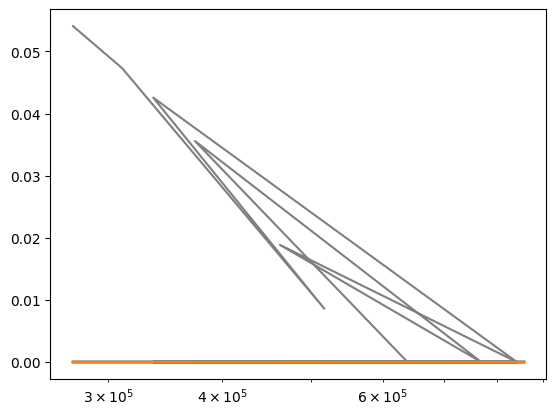

In [51]:
ax=plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")
#farklı lambda değerlerine karşı katsayıların değişimi = 0 a yaklaştırır. 

In [53]:
lasso_model.predict(X_train[0:15])

array([ 377.26270596,  786.51524513,  495.14140718,  117.19492966,
        429.04228506, 1002.11334796,  154.15381011,  359.68989378,
        484.56926344,  915.91820524, 1621.36681998,  818.02000998,
        920.38922996,  740.0753365 ,  648.91895825])

In [54]:
lasso_model.predict(X_test[0:15])

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712,  344.61472086,  662.19913564,  452.93891559,
        913.97254298,  646.93182594,  693.29127151,  889.72270225,
        216.80738955,  444.31679776,  267.43564315])

In [55]:
y_pred=lasso_model.predict(X_test)

In [56]:
import numpy as np
np.sqrt(mean_squared_error(y_test,y_pred))


356.0975884554034

In [ ]:
r2_score(y_test,y_pred) #bağımsız değişkenlerce bağımlı değişkenlerin açıklanma yüzdesi

0.41422798132366156

In [59]:
# Model tuning
from sklearn.linear_model import LassoCV
lasso_cv_model=LassoCV(cv=10,max_iter=10000).fit(X_train,y_train)
lasso_cv_model.alpha_ # find the best alpha value 

lasso_tuned=Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [60]:
y_pred=lasso_tuned.predict(X_test)
import numpy as np
np.sqrt(mean_squared_error(y_test,y_pred))


373.59572250697937

In [ ]:
pd.Series(lasso_tuned.coef_,index=X_train.columns)
#katsayıları 0 olanlar anlamsız değişkenlerdir. 

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_A      -0.000000
League_N       0.000000
Division_E     0.000000
Division_W    -0.000000
NewLeague_A   -0.000000
NewLeague_N    0.000000
dtype: float64